In [1]:
import pandas as pd

In [2]:
s1 = pd.Series(['ho','ag','ra','maa'],index=['a','b','c','d'])

In [3]:
s1

a     ho
b     ag
c     ra
d    maa
dtype: object

In [4]:
s2 = pd.Series([1,11,22,2],index=['a','b','c','d'])

In [5]:
s1

a     ho
b     ag
c     ra
d    maa
dtype: object

In [6]:
s2

a     1
b    11
c    22
d     2
dtype: int64

In [8]:
df = pd.DataFrame({'S1':s1,'S2':s2})

In [10]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [11]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
hr_data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
8739,0.69,0.82,4,137,2,1,0,0,technical,low
9255,0.71,0.48,3,161,3,0,0,0,sales,low
11265,0.18,0.75,3,142,2,0,0,0,product_mng,low
1741,0.46,0.50,2,146,3,0,1,0,IT,medium
10867,0.80,0.72,4,173,3,0,0,0,accounting,low


### Identify the columns of object types

In [15]:
cat_hr_data = hr_data.select_dtypes(include=['object'])

In [17]:
cat_hr_data.columns

Index(['sales', 'salary'], dtype='object')

In [18]:
cat_hr_data.sales

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: sales, Length: 14999, dtype: object

In [20]:
cat_hr_data[['sales','salary']].head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [21]:
cat_hr_data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### We realise that sales is wrong column name

In [22]:
hr_data.rename(columns={'sales':'department'}, inplace=True)

In [23]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Understand salary distribution in the company

In [25]:
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Salary Prediction
* If you are building a model for prediction of salary., 
* Feature data will be (avg_montly_hrs, left ...) and traget data will be salary
* 3 class classification model

### Employee distribution across dept

In [26]:
hr_data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Which is the most satisfied team

In [28]:
hr_data.groupby(['department']).satisfaction_level.mean()

department
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

### Identify ideal number of projects 

In [30]:
hr_data.groupby(['number_project']).satisfaction_level.mean()

number_project
2    0.478769
3    0.687670
4    0.695132
5    0.678888
6    0.273458
7    0.118711
Name: satisfaction_level, dtype: float64

In [32]:
hr_data.groupby(['number_project','left']).satisfaction_level.count()

number_project  left
2               0        821
                1       1567
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               0        519
                1        655
7               1        256
Name: satisfaction_level, dtype: int64

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
### relationship between avg_working_hrs, satisfaction & left

Text(0, 0.5, 'avg_montly_hrs')

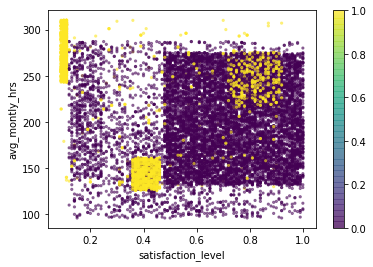

In [40]:
plt.scatter(x=hr_data.satisfaction_level, y=hr_data.average_montly_hours, c=hr_data.left,s=5, alpha=.5)
plt.colorbar()
plt.xlabel('satisfaction_level')
plt.ylabel('avg_montly_hrs')

### Inferances
* Yellow means people who have left the organization
* Purple means people who are still with the company